# Principal Component Analysis

## Theory of Principal Component Analysis

As the name suggests, the objective of principal component analysis is to select the most important features in order to **create a subspace of smaller dimension that retains the most information**. It aims at decreasing the dimension of the dataset from $d$ to $k$ with $ d \ge k$, while capturing the essence of the original data. We consider the dispertion of the data with respect to a feature as the importance of this feature, i.e the more dispersed the data is with respect to a feature, the more useful this feature will be in order to create clusters.

### First example in 2 dimensions
<center>
    <figure>
        <img src="./pictures/PCA_rotation.png">
        <figcaption>Fig.1 - PCA example from wikipedia with the transformation to apply</figcaption>
    </figure>
</center>

On the example above, we can clearly see that the feature represented on the X-axis is the most important feature, whereas the one on the Y-axis is less important. Indeed, the variation is greater on the X-axis as it is on the Y-axis. The objective will be to rotate the data as shown in red in order to increase the variance with respect to the X axis, and decrease the variance with respect to the Y axis. As a result, it will create a new space where both axis are independent linear combinations of X and Y (see below). A little bit of mathematical formalization is necessary in order to clearly understand how one can compute the importance and the dispersion of each feature. 

1. **Find the center of the dataset**. We can see on the graph above that the origin of the 2 vectors is at the center of the dataset. This point can be found by computing the mean of each feature, here we see that the mean of the data on the X axis is 1, and that the mean on the Y axis is 3. Therefore, the center of the dataset is the point (1,3). Then when move the data set so that its center is on the origin. This operation does not change the dataset, we only "move" the axis so that the origin is on the mean. 
2. **Find the direction of the main vector**. The data above has a nice shape that makes quite obvious the direction in which the main vector should be. However, it is still necessary to compute the precise direction. This can be done by fitting a line through the dataset, the same way than for a linear regression problem, either by minimizing the square distances between the line and the points ($d_i$) or by maximizing the square distances between the projection of the point on the line ($d*_i$) and the origin. The equivalent holds because of the pytagorian theorem : since : $b^2_i = d_i^2 + d_i^{*2}$, then : $min(\sum_{i=1}^d d_i^2) \equiv max(\sum_{i=1}^d d^{*2}_i)$. We can have this intuition by looking at the line : as the line gets closer to the data point $i$, $d_i$ decreases and $d*_i$ increases as it gets closer to its hypothenuse. 

<center>
    <figure>
        <img src="./pictures/fit_line.png" width="450" height="300">
        <figcaption>Fig.2 - Line fitting through the dataset</figcaption>
    </figure>
</center>

Then, we can find the best fitting line by solving one of the two optimisation problems above. Mathematically, we can achieve this by computing the products of the data points and the vector $u$ that defines the fitting line : $max(\sum_{i=1}^d (x_i^Tu)^2) $ Here, the fitting line has a slope of 1/3, i.e. for each variation of 3 on the X axis, there is only a variation of 1 on the Y axis. This means that the feature X is 3 times more important than Y for the PC1, and thus the PC1 can be seen as the result of a **linear combination such as : 3.X + Y** . Indeed, in principal component analysis, we replace the features by a linear combination of the features. Therefore, a data point will not depend on $X$ and $Y$ alone, but on two linear combination of both. 

Now that we have the the direction of the fitting line, we need to find the unit vector, i.e. the vector that corresponds to moving of one unit on the fitting line. Note that this unit vector corresponds to the eingenvector. We start from the vector above $(3,1)$ that we will scale to a length of 1 by using the pytagorian theorem. Obviously, the lienar relation between X and Y remains, as : $3 \times \frac{1}{\sqrt{10}} = \frac{3}{\sqrt{10}}$. This means that for the principal component 1, that we see on the figure below, the feature X is 3 times as important as the feature Y, and that PC1 depends on both X and Y.

$$
length_{vectorA}^2 = 3^2 + 1^2 \iff length_{vectorA} = \sqrt{10}
$$

$$
PC1\ unit\ vector = (\frac{3}{\sqrt{10}},\frac{1}{\sqrt{10}})
$$

<center>
    <figure>
        <img src="./pictures/unit_vector.png" width="450" height="300">
        <figcaption>Fig.3 - Computing the unit vector</figcaption>
    </figure>
</center>

Because there are only 2 dimensions in this example, the PC2 is the line perpendicular to PC1 that goes through the origin. Indeed, in order to classify to importance of each PC, they have to be independent, so PC2 has to be orthogonal to PC1, which, in a 2D space, is a perpendicular line. Otherwise, a part of a change in PC1 could be explained as a change in PC2,wich can easely be represented graphically. The slope of the PC2 line is -3, wich means that PC2 is a linear combination of the form : -X+3Y. Then again we scale the vector : 

$$
PC2\ unit\ vector = (\frac{-1}{\sqrt{10}},\frac{3}{\sqrt{10}})
$$

Once we have the two unit vectors and therefore the two PC, we can project the data set onto this new space. Then we rotate the new space and we obtain a new representation of the dataset that extends the most important feature. We can see that the relation between the points remains the same as on fig.2, however the variance increased on the X axis and decreased on the Y axis. The points are now represented as a function of PC1 and PC2, both of which are independent linear combinations of X and Y.

<div style="display:flex;justify-content:space-around">
    <img src="./pictures/PCA_projection.png" width="350" height="250">
    <img src="./pictures/PCA_newspace.png" width="350" height="250" style="transform:rotate(-4deg);">
</div>

<br>
Finally, we can compute the importance of each feature in the total variation of the PCs. First, we compute the sum of square distances of the projections of the points relatively to the origin divided by (n-1). For PC1 it is the sum of square distances between each green cross and the origin devided by 9 (there are 10 data points), and for PC2 we do the same with the blue crosses. Let's say for the sake of the example that the variation for PC1 is equal to 20, and that it is equal to 5 for PC2. Then the total variation is equal to 20, and PC1 accounts for 20/25 = 80% of the variation, and PC2 accounts for 20% of the variation. 

### Generalisation in more dimensions
In a real life scenario where there are many more features and dimensions, it is impossible to proceed by representing the dataset in the entire space. Indeed, even the simple example above of a customer dataset is in 5 dimensions, and thus impossible to represent graphically. In order to do a PCA and classify the importance of each component, it is necessary to adopt a mathematical approach and to compute the **covariance matrix**. The covariance matrix, called $\Sigma$, is a matrix where the element $(i,j)$ corresponds to the covariance of the features $X_i,X_j$. Note : the covariance of $X_i,X_i$ is equal to the variance of $X_i$, therefore the diagonal of the covariance matrix is composed of the variance of each feature.

$$
cov(X_i,X_j) = E[(X_i - \mu_i)(X_j - \mu_j)] 
$$

<div style="text-align:center">

<em><small>with $\mu_i$, $\mu_j$ the expected values of the $i^{th}$ and $j^{th}$ features.</small></em>

</div>

$$
\begin{align}
\Sigma 
& = E[(\boldsymbol{X}−E[\boldsymbol{X}])(\boldsymbol{X}−E[\boldsymbol{X}])^T] \\
& = \frac{1}{n} \sum_i x_ix_i^T
\end{align}
$$

<div style="text-align:center">

<em><small>with $\boldsymbol{X}$ the matrix of observations.</small></em>

</div>

Once we computed the covariance matrix, we can find the **corresponding eingenvectors and eigenvalues**. 

:::{note}
Remember that $\lambda$ is said to be an **eigenvalue of** $\Sigma$ if:

$$\boldsymbol{\Sigma - \lambda I = 0 \Rightarrow \Sigma u = \lambda u}$$
:::

Because the features are supposed to be linearly independent, we should find the same number of eingenvectors and eingenvalues as features. Mathematically, we can show that finding : $ max(\sum_{i=1}^d (x_i^Tu)^2) \text{, with : }u^Tu = 1 $ corresponds to finding the matrix of eingenvectors. Recall that it is by solving this optimization problem that we find the fitting line. We can find the solution to this maximisation problem by using the Lagrange function $L$ and its derivative with respect to $u$ in order to find the directions that preserves the most information after the projection, and then find $\lambda$ and $u$:

$$
\begin{align}
max[\sum_{i=1}^d (x_i^Tu)^2]
& = max[\sum_{i=1}^d (u^Tx_i)(x_i^Tu)] \\ 
& = \boldsymbol{max[u^T\Sigma u]} 
\end{align}
$$

<div style="text-align:center;margin-top:10px;margin-bottom:30px">
<em><small>The maximization problem leads to finding the eigenvectors with the Lagrange function :</small></em>
</div>

$$ 
\begin{align}
\text{Lagrange function : } & L(u,\lambda) = u^T\Sigma u - \lambda ( u^Tu-1)
\\
\text{First derivative : } & \frac{\partial L}{\partial u} = 2 \Sigma u - 2 \lambda u
\\
\text{We set : } & 2 \Sigma u - 2 \lambda u = 0 \iff \boldsymbol{ \Sigma u = \lambda u}
\end{align}
$$

<div style="text-align:center;margin-top:10px;margin-bottom:30px">
<em><small>We solve this last equation to find the eigenvalues and eigenvectors:</small></em>
</div>

$$
\begin{align}
(\lambda_1, ... ,\lambda_d) \text{ solution of : } & \Sigma - \lambda I = 0
\\
\text{Therefore : }& \forall \lambda_i \in (\lambda_1, ... ,\lambda_d), \exists u_i \ \Sigma u_i = \lambda_i u_i
\\
(u_1, ... ,u_d) \text{ solution of : } & (\Sigma - \lambda_i I) u_i= 0
\end{align}
$$

Now that we have the eingevectors and their associated eigenvalues, we can classify them by their order of importance: the greater the eingenvalue, the more important the eigenvector is. We then select the k-biggest eigenvectors (the data scientist gets to choose k!). Note that by definition, the total variation is given by the sum of the variances. It turns out that this is also equal to the sum of the eigenvalues of the variance-covariance matrix: $\sum_{i=1}^k \lambda_i$. As a consequence, it is only by selecting the k-biggest eigenvalues that we get the largest variation possible for the subspace. Finally, we project the dataset onto the newly formed space of size k by multiplying the matrix of eigenvectors with the standardized dataset :

$$
ProjectedDataSet = FeatureVector^T * StandardizedDataSet
$$

In conclusion, we start by looking at the dataset in order to compute the covariance matrix (1). Then we compute the eigenvectors and eigenvalues (2). Finally, we can project the data onto a smaller space (3). Here, the space is in 4 dimensions, which can be represented with the help of a color chart.

<center>
    <figure>
        <img src="./pictures/PCA_summary.png" >
        <figcaption>Fig.4 - Summary</figcaption>
    </figure>
</center>

````{admonition} Sources and other documentation 
:class: tip
<a href="https://www.youtube.com/watch?v=FD4DeN81ODY"> PCA by Visually Explained</a><br>
<a href="https://www.youtube.com/watch?v=_UVHneBUBW0"> PCA by StatQuest</a><br>
<a href="https://online.stat.psu.edu/stat505/lesson/4/4.5">Eigenvectors and eingevalues explained </a>
````

## Principal Component Analysis in Python

### 2-dimensional example :

##### Create the dataset 

We start by creating a random dataset in 2 dimensions with numpy. The cell below shows how to quickly create a random data set in 2 dimensions, and how to transform it. For the purpose of the exercise, we will recreate the dataset from fig.2, where the points are distributed along a line that has a slope of 3. Then, we use the function **PCA** from sklearn in order to do our PCA analysis. 

```python
import numpy as np
from sklearn.datasets import make_regression
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
```

```python
# generate 2d classification dataset
X, y = make_regression(n_samples=200, n_features=1, noise=20,random_state=4)
X = scale(X)*3
y = scale(y)
plt.scatter(X,y)
plt.title("Reproduction of the dataset in fig.2")
plt.rcParams["figure.figsize"] = (10,5)
plt.show()
```

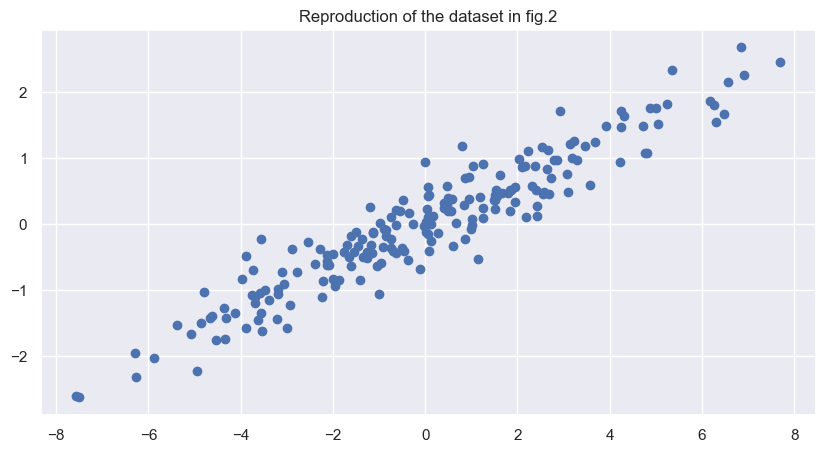

In [174]:
import numpy as np
from sklearn.datasets import make_regression,make_classification
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# generate 2d classification dataset
X, y = make_regression(n_samples=200, n_features=1, noise=20,random_state=4) #Here we will concatenate X and y so we only need 1 feature
X = scale(X)*3
y = scale(y)
plt.scatter(X,y)
plt.title("Reproduction of the dataset in fig.2")
plt.rcParams["figure.figsize"] = (10,5)
plt.show()


##### PCA analysis 

Now that the dataset is ready, we can work on the principal component analysis : 

```python
# We use the PCA function from sklearn
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # The dataset is in 2 dimension, therefore we set n_components to 2 

dataset = np.concatenate((X,np.reshape(y,(200,1))),axis=1)
pca.fit(dataset)

components = pca.components_
variance = pca.explained_variance_
variance_ratio = pca.explained_variance_ratio_
```

```python
print(f"The unit vector for PC1 is: {components[0]}")
print(f"The unit vector for PC2 is: {components[1]}")
print(f"PC1 variance is: {variance[0]}, and accounts for {variance[0].2f}% of the total variance")
print(f"PC2 variance is: {variance[1]}, and accounts for {variance[1].2f}% of the total variance")
```

In [152]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
dataset = np.concatenate((X,np.reshape(y,(200,1))),axis=1)
pca.fit(dataset)

components = pca.components_
variance = pca.explained_variance_
variance_ratio = pca.explained_variance_ratio_

print(f"The unit vector for PC1 is: {components[0]}")
print(f"The unit vector for PC2 is: {components[1]}")
print(f"PC1 variance is: {variance[0]}, and accounts for {round(variance_ratio[0],2)}% of the total variance")
print(f"PC2 variance is: {variance[1]}, and accounts for {round(variance_ratio[1],2)}% of the total variance")

The unit vector for PC1 is: [0.95276949 0.30369443]
The unit vector for PC2 is: [-0.30369443  0.95276949]
PC1 variance is: 9.954501880356124, and accounts for 0.99% of the total variance
PC2 variance is: 0.09574937592527562, and accounts for 0.01% of the total variance


Knowing that $ \frac{1}{\sqrt{10}} \approx 0.31$, we can see that we find the very similar vectors as we did above. However, the data being less noisy here than in our first example, we found a PC1 that accounts for a larger part of the variation ! 

##### Dimension reduction

Sklearn also allows to reduce the dimension of the dataset. The graph below represent the projection of the dataset onto PC1. 

```python
# Reduce the dataset to 1 dimension : 
pca = PCA(n_components=1)
pca.fit(dataset)
X_pca = pca.transform(dataset)
print("original shape:   ", dataset.shape)
print("transformed shape:", X_pca.shape)

X_new = pca.inverse_transform(X_pca)
plt.scatter(dataset[:, 0], dataset[:, 1], alpha=0.4)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.9)
plt.show()
```

original shape:    (200, 2)
transformed shape: (200, 1)


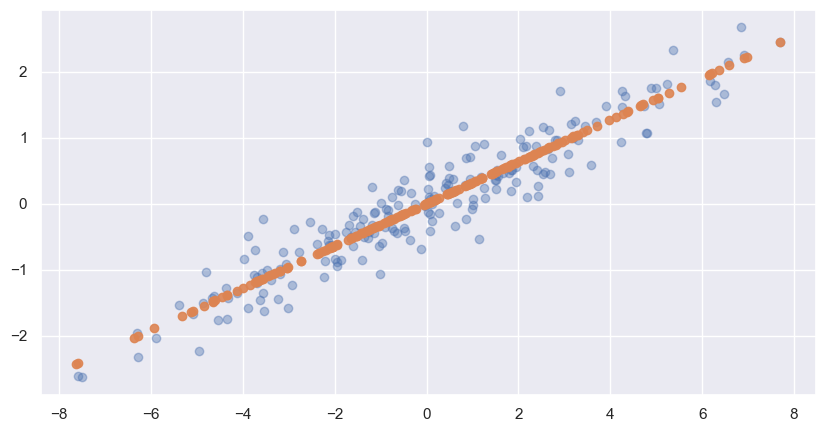

In [160]:
# Reduce the dataset to 1 dimension : 
pca = PCA(n_components=1)
pca.fit(dataset)
X_pca = pca.transform(dataset)
print("original shape:   ", dataset.shape)
print("transformed shape:", X_pca.shape)

X_new = pca.inverse_transform(X_pca)
plt.scatter(dataset[:, 0], dataset[:, 1], alpha=0.4)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.9)
plt.show()

## Example in higher dimensions 

This example is closer to a real life example. We consider a classification problem in 20 dimensions and we aim at reducing its size. 

##### Create the dataset

```python
#Generate a random dataset 
X,y = make_classification(n_samples=200, n_features=20,n_informative=3,random_state=100) 
#Here we will work only with X in 20 dimensions, with only 4 useful features 
print(X.shape, y.shape)
```

In [300]:
#Generate a random dataset 
X,y = make_classification(n_samples=200, n_features=20,n_informative=3,random_state=100) #Here we will work only with X in 20 dimensions, with only 4 useful features 
print(X.shape, y.shape)

(200, 20) (200,)


##### Principal Components Analysis

```python 
#Then we do our PCA and look at the most important components 
pca = PCA()
pca_X =pca.fit(X)
pca_names = pca_X.get_feature_names_out()
pca_values = pca_X.singular_values_
plt.bar(pca_names,pca_values)
```

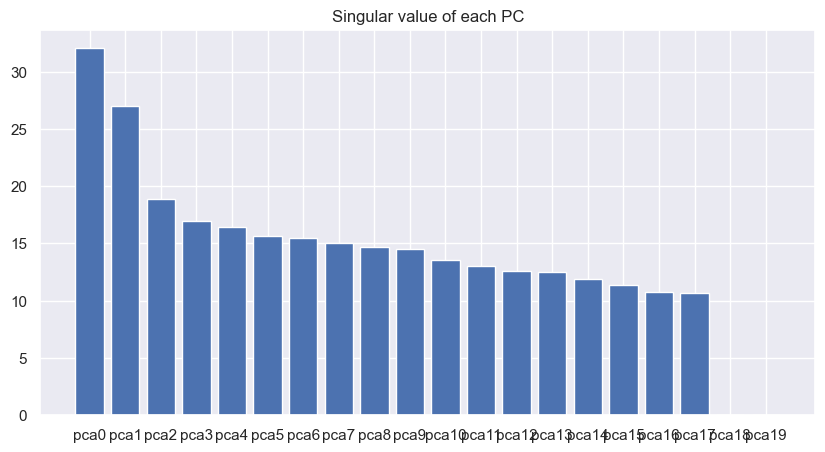

In [306]:
#Then we do our PCA and look at the most important components 
pca = PCA()
pca_X =pca.fit(X)
pca_names = pca_X.get_feature_names_out()
pca_values = pca_X.singular_values_
plt.bar(pca_names,pca_values)
plt.title("Singular value of each PC")
plt.show()

We see that the 3 first PC are significantly more important than the others. We can deepen our analysis by looking at the features that influence the most those 3 PC. 

```python
X_axis = np.arange(20)

components = pca_X.components_[:3]

plt.bar(X_axis - 0.2, components[0], 0.2, label = 'PC1')
plt.bar(X_axis , components[1], 0.2, label = 'PC2')
plt.bar(X_axis + 0.2, components[2], 0.2, label = 'PC3')
plt.xticks(X_axis, X_axis)
plt.xlabel("Features")
plt.ylabel("Feature importance")
plt.title("Feature importance in PC")
plt.legend()
plt.show()
```

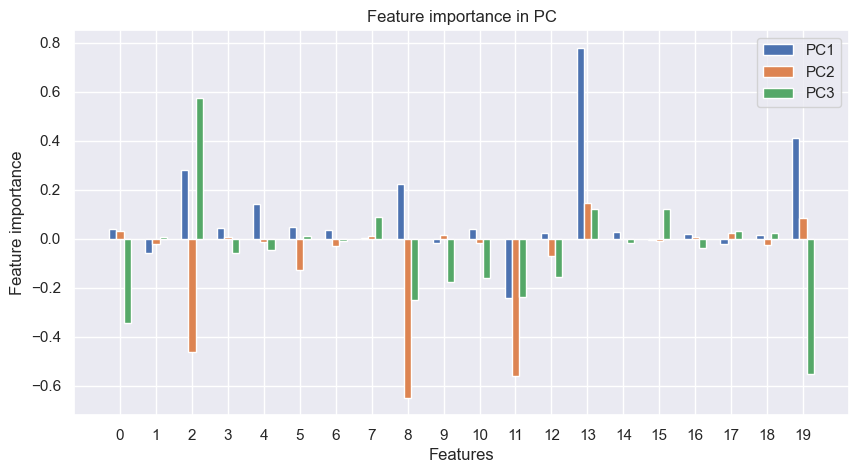

In [302]:
X_axis = np.arange(20)

components = pca_X.components_[:3]

plt.bar(X_axis - 0.2, components[0], 0.2, label = 'PC1')
plt.bar(X_axis , components[1], 0.2, label = 'PC2')
plt.bar(X_axis + 0.2, components[2], 0.2, label = 'PC3')
plt.xticks(X_axis, X_axis)
plt.xlabel("Features")
plt.ylabel("Feature importance")
plt.title("Feature importance in PC")
plt.legend()
plt.show()

##### Dimension reduction

```python
# Reduce the dataset to 3 dimensions : 
pca_3D = PCA(n_components=3)
pca_3D.fit(X)
projection_X = pca_3D.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", projection_X.shape)
```

In [303]:
# Reduce the dataset to 3 dimensions : 
pca_3D = PCA(n_components=3)
pca_3D.fit(X)
projection_X = pca_3D.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", projection_X.shape)

original shape:    (200, 20)
transformed shape: (200, 3)


```python
from mpl_toolkits.mplot3d import Axes3D

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# plot
sc = ax.scatter(projection_X[:,0], projection_X[:,1], projection_X[:,2], s=35, c=y, cmap="bwr", marker="o", alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.show()
```

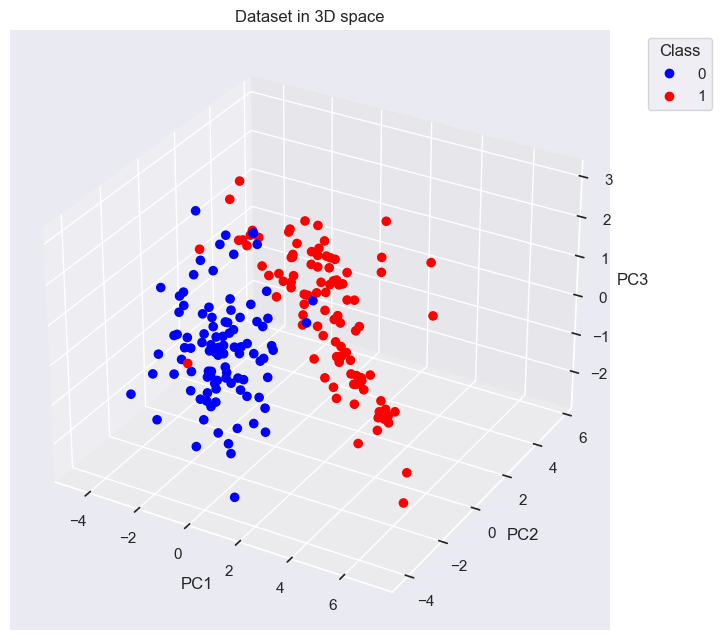

In [307]:
from mpl_toolkits.mplot3d import Axes3D

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# plot
sc = ax.scatter(projection_X[:,0], projection_X[:,1], projection_X[:,2], s=35, c=y, cmap="bwr", marker="o", alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2,title="Class")
plt.title("Dataset in 3D space")
# save
plt.show()

We now have our dataset represented in a 3 dimensional space defined by the PC1, PC2 and PC3, and we can see two different clusters for each class. We can now easily analyse our dataset, due to Principal Component Analysis !